In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("/Users/tanya/Downloads/projects/Clean_Dataset.csv")

In [3]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
#Dropping the first column since it isn't required.
df.drop("Unnamed: 0",axis=1,inplace=True)

In [5]:
print("There are {} observations for {} predictors.".format(df.shape[0],df.shape[1]))

There are 300153 observations for 11 predictors.


In [6]:
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
airline,300153,6,Vistara,127859,NaN,NaN,NaN,NaN,NaN,NaN,NaN
flight,300153,1561,UK-706,3235,NaN,NaN,NaN,NaN,NaN,NaN,NaN
source_city,300153,6,Delhi,61343,NaN,NaN,NaN,NaN,NaN,NaN,NaN
departure_time,300153,6,Morning,71146,NaN,NaN,NaN,NaN,NaN,NaN,NaN
stops,300153,3,one,250863,NaN,NaN,NaN,NaN,NaN,NaN,NaN
arrival_time,300153,6,Night,91538,NaN,NaN,NaN,NaN,NaN,NaN,NaN
destination_city,300153,6,Mumbai,59097,NaN,NaN,NaN,NaN,NaN,NaN,NaN
class,300153,2,Economy,206666,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,300153.0,NaN,NaN,NaN,12.221021,7.191997,0.83,6.83,11.25,16.17,49.83
days_left,300153.0,NaN,NaN,NaN,26.004751,13.561004,1.0,15.0,26.0,38.0,49.0


<AxesSubplot:xlabel='price'>

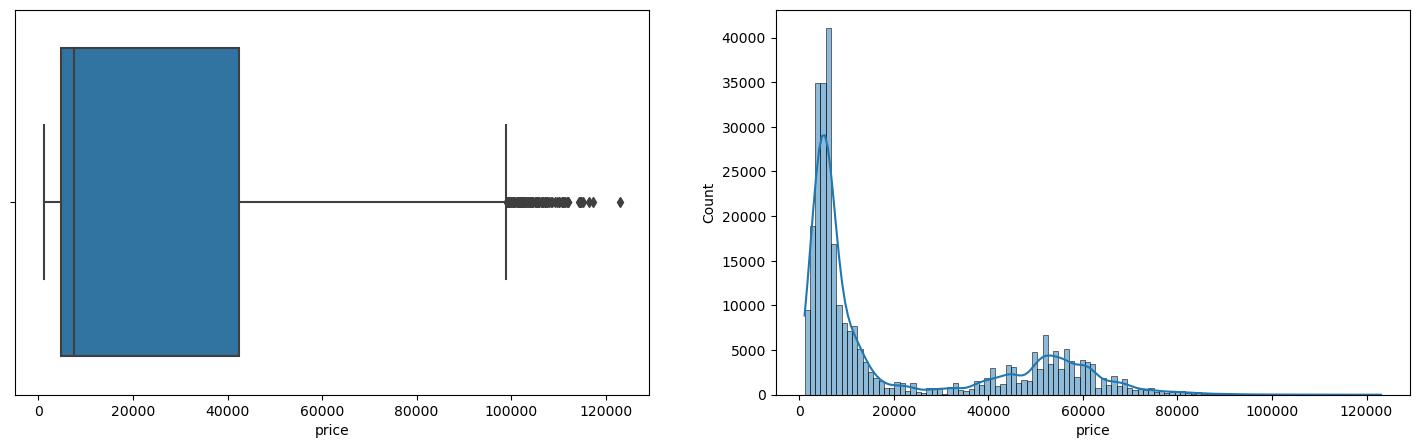

In [9]:
plt.figure(figsize = (18,5))
plt.subplot(1,2,2)
sns.histplot(x = 'price', data = df, kde = True)
plt.subplot(1,2,1)
sns.boxplot(x = 'price', data = df)

<AxesSubplot:xlabel='duration'>

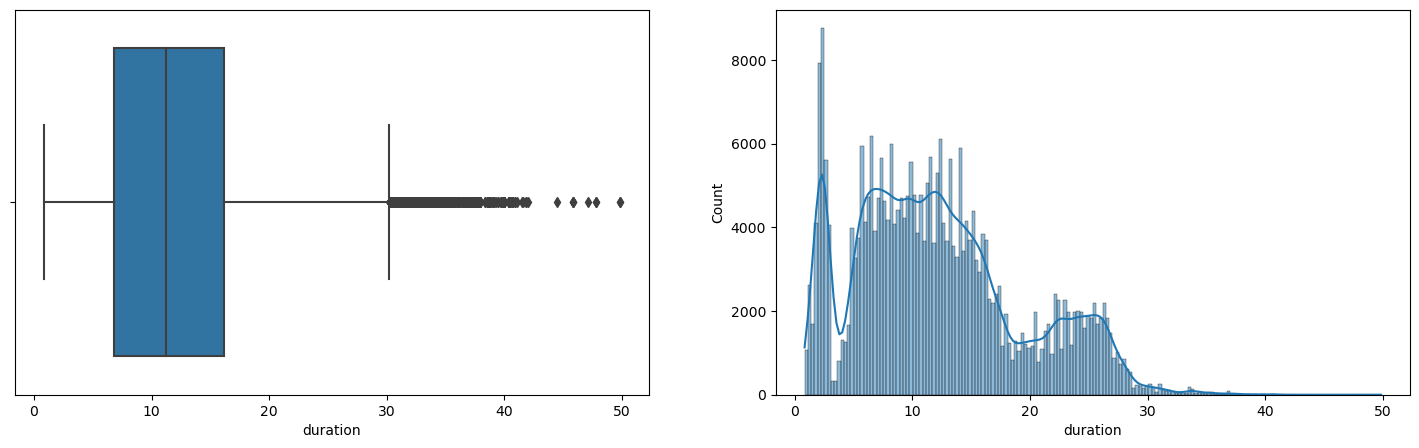

In [10]:
plt.figure(figsize = (18,5))
plt.subplot(1,2,2)
sns.histplot(x = 'duration', data = df, kde = True)
plt.subplot(1,2,1)
sns.boxplot(x = 'duration', data = df)

In [11]:
# Let's get the count values of the data corresponding to those outliers in each feature:
print ("'duration' feature Outliers:", df[df['duration']>30].count(), sep = '\n')

'duration' feature Outliers:
airline             2226
flight              2226
source_city         2226
departure_time      2226
stops               2226
arrival_time        2226
destination_city    2226
class               2226
duration            2226
days_left           2226
price               2226
dtype: int64


In [12]:
# Get the outliers (with their corresponding data) percentage:
(2226/300153)*100

0.7416217728958232

We can see that it's a very very small percentage (≈0.74%), so we can drop them with a great confidence, but because we will be dropping some critical data from the "days_left" feature; we need to double check, in case we don't want to drop those critical data from the "days_left" feature or in case the percentage was great (>10%).

So, let's use some visualizations:

Text(0, 0.5, 'price')

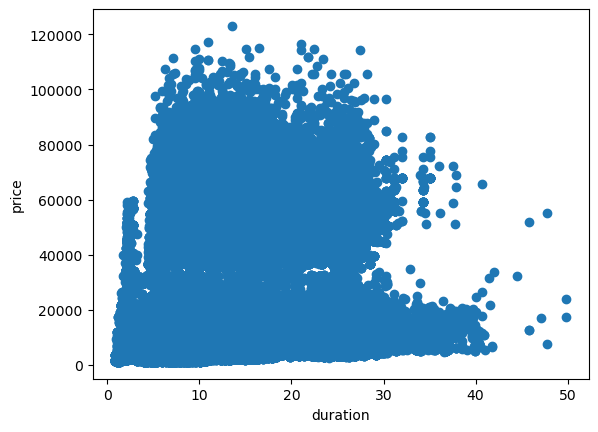

In [13]:
plt.scatter(df['duration'] , df['price'])
plt.xlabel ("duration")
plt.ylabel ("price")

In [14]:
print ("'duration' feature most Outliers:", df[df['duration']>40].count(), sep = '\n')

'duration' feature most Outliers:
airline             48
flight              48
source_city         48
departure_time      48
stops               48
arrival_time        48
destination_city    48
class               48
duration            48
days_left           48
price               48
dtype: int64


Now we can drop those very very tiny outliers with their very very tiny corresponding data, and that if we don't want to lose much data by removing the 2226 observations.

In [15]:
df_new = df[df['duration']<=40]
df_new.shape

(300105, 11)

In [16]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_new['stops'] = df_new['stops'].replace({'one': 1,
                                   'zero': 0,
                                   'two_or_more': 2})
categorical = ['flight','airline','source_city','departure_time', 'arrival_time', 'destination_city','class']
df_new[categorical] = df_new[categorical].apply(label_encoder.fit_transform)
df_new.tail()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
300148,5,1477,1,4,1,2,3,0,10.08,49,69265
300149,5,1481,1,0,1,5,3,0,10.42,49,77105
300150,5,1486,1,1,1,5,3,0,13.83,49,79099
300151,5,1483,1,1,1,2,3,0,10.00,49,81585
300152,5,1477,1,4,1,2,3,0,10.08,49,81585


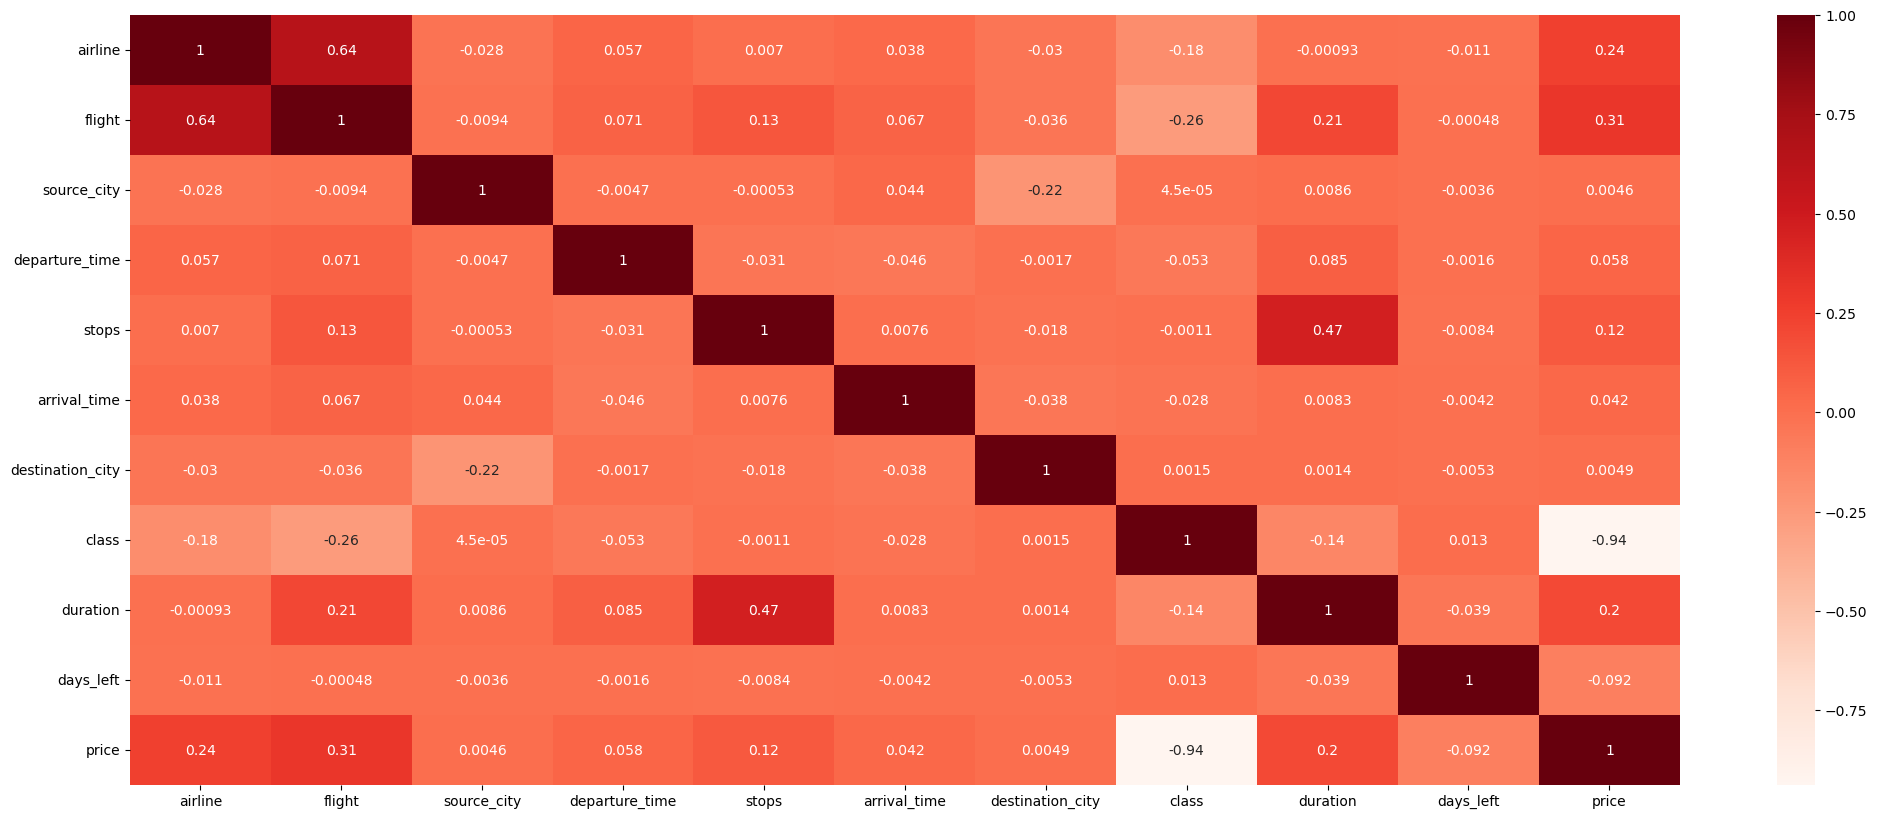

In [17]:
plt.figure(figsize=(25,10))
cor = df_new.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [18]:
df_new2 = df_new.drop('flight', axis = 1)
df_new2.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,2,2,0,5,5,1,2.17,1,5953
1,4,2,1,0,4,5,1,2.33,1,5953
2,0,2,1,0,1,5,1,2.17,1,5956
3,5,2,4,0,0,5,1,2.25,1,5955
4,5,2,4,0,4,5,1,2.33,1,5955


In [19]:
X = df_new2.drop('price', axis = 1)
y = df_new2['price']

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


reg = LinearRegression().fit(X_train, y_train)


y_pred_train = reg.predict(X_train)
y_pred_test = reg.predict(X_test)
accuracy_train = reg.score(X_train, y_train)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

In [24]:
print("R2 Score: ",r2_score(y_test,y_pred_test))
print("Mean Squared Error: ",mean_squared_error(y_test, y_pred_test))
print('Mean Absolute Error', mean_absolute_error(y_test, y_pred_test))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred_test)))

R2 Score:  0.9072851590051217
Mean Squared Error:  47644356.167438075
Mean Absolute Error 4518.177774644642
Root Mean Squared Error: 6902.489128382462


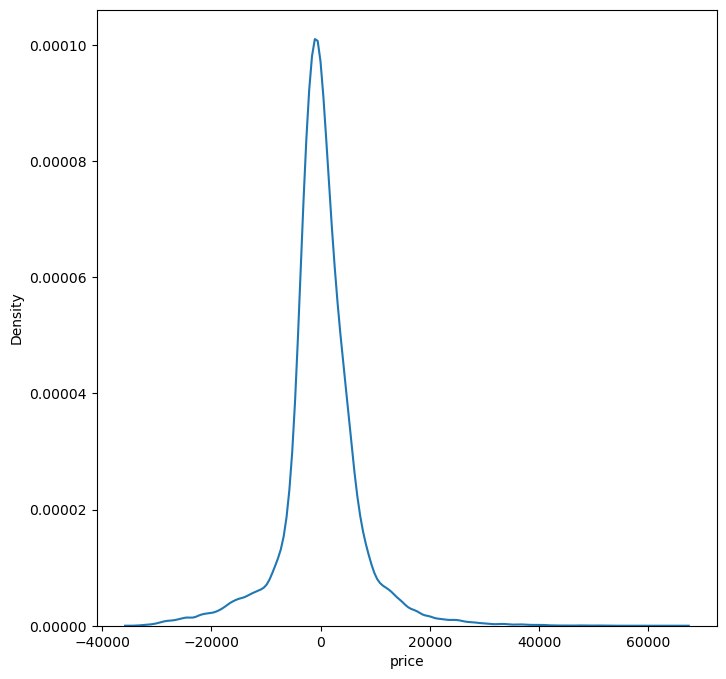

In [26]:
plt.figure(figsize = (8,8))
sns.kdeplot(y_test-y_pred_test)
plt.show()